In [1]:
%pylab inline
from __future__ import division

from main import *

Populating the interactive namespace from numpy and matplotlib
--- 0.988414049149 seconds ---


In [2]:
init_dict = pickle.load(open('init_dict_PP1_100_CamCatot_14800_CamSpeed_x10x100_K5_700_PP2B_x01.p','rb'))
init_array = init_dict.values()

t_end_to_steady_states = 150000.
time_step = 1.

res = MSc.main(init_array, params_array, nb_eq, t_start, t_end_to_steady_states, time_step, h_step = 1e-8, rel_err = 1e-8, abs_err = 1e-8)
y_serie = pd.DataFrame(res[:,1:], columns = init_keys, index = res[:,0])

phos_sum = y_serie['B1'] + 2*(y_serie['B2'] + y_serie['B3'] + y_serie['B4']) + 3*(y_serie['B5'] + y_serie['B6'] + y_serie['B7'] + y_serie['B8']) + 4*(y_serie['B9'] + y_serie['B10'] + y_serie['B11']) + 5*y_serie['B12'] + 6*y_serie['B13']

y_serie['phos_sum'] = phos_sum


phos_sum_max = 164.6*1e3 # C'est quoi le calcul ???
fpost = 1 +3.5 *phos_sum/phos_sum_max
y_serie['fpost'] = fpost

    
if params_dict['on_ECb']:
    if params_dict['ECb_CB1R_on']:
        ctrl1 = params_dict['kCB1R'] *y_serie['o_CB1R'] +params_dict['gamma1DA'] *params_dict['DA'] # No unit
        ctrl2 = params_dict['kCB1R'] *y_serie['o_CB1R'] +params_dict['gamma2DA'] *params_dict['DA'] # No unit

    else:
        ctrl1 = params_dict['alphatwoAGCB1'] *y_serie['twoAG'] +params_dict['betaAEACB1']*params_dict['alphaAEACB1']*y_serie['AEA'] +params_dict['gamma1DA'] *params_dict['DA'] # No unit
        ctrl2 = params_dict['alphatwoAGCB1'] *y_serie['twoAG'] +params_dict['betaAEACB1']*params_dict['alphaAEACB1']*y_serie['AEA'] +params_dict['gamma2DA'] *params_dict['DA'] # No unit

y_serie['yCB1R'] = ctrl1

In [3]:
# General functions #
import sys
sys.path.append('/Users/alexandre/Desktop/INRIA/Prog/Python/')

from utils import ToHtmlTableColumns, DataFrame_to_html, DataFrame_plot_pylab

In [4]:
var_to_plot = ['h_caL13', 'm_caL13', 'o_AMPA', 'd_AMPA', 'o_NMDA', 'h_CICR', 'Ca_cyt', 'Ca_ER', 'PkcCa', 'PP2Acal',
               'Ip3', 'Dag', 'Dgl',
               'two_ag', 'AEA','fpre', 'PP1', 'V', 'o_CB1R', 'd_CB1R', 'GluOut', 'Da',
               'B1', 'B2','B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12','B13', 'phos_sum', 'fpost',
               'Cam', 'CamCa2C', 'CamCa2N', 'CamCa4', 'PP2BCam', 'PP2BCamCa2C', 'PP2BCamCa2N', 'PP2BCamCa4', 
               'D32p34PP2BCamCa4', 'PDE1CamCa4', 'PDE1CamCa4cAMP', 'AC1GsaCamCa4', 
               'AC1GsaCamCa4ATP', 'AC1CamCa4', 'AC1CamCa4ATP', 'ACh',
               'pPDE10PP1', 'pPDE4PP1', 'D32p34PP1', 'D32p34PP1PP2BCamCa4', 'D32p34PP1PP2ABPR72', 'D32p34PP1PP2AB56d', 'PP1pAKAR3',
               'pmcaCa', 'ncxCa', 'yCB1R']
y_serie_temp = y_serie[var_to_plot]
#y_serie_temp = y_serie

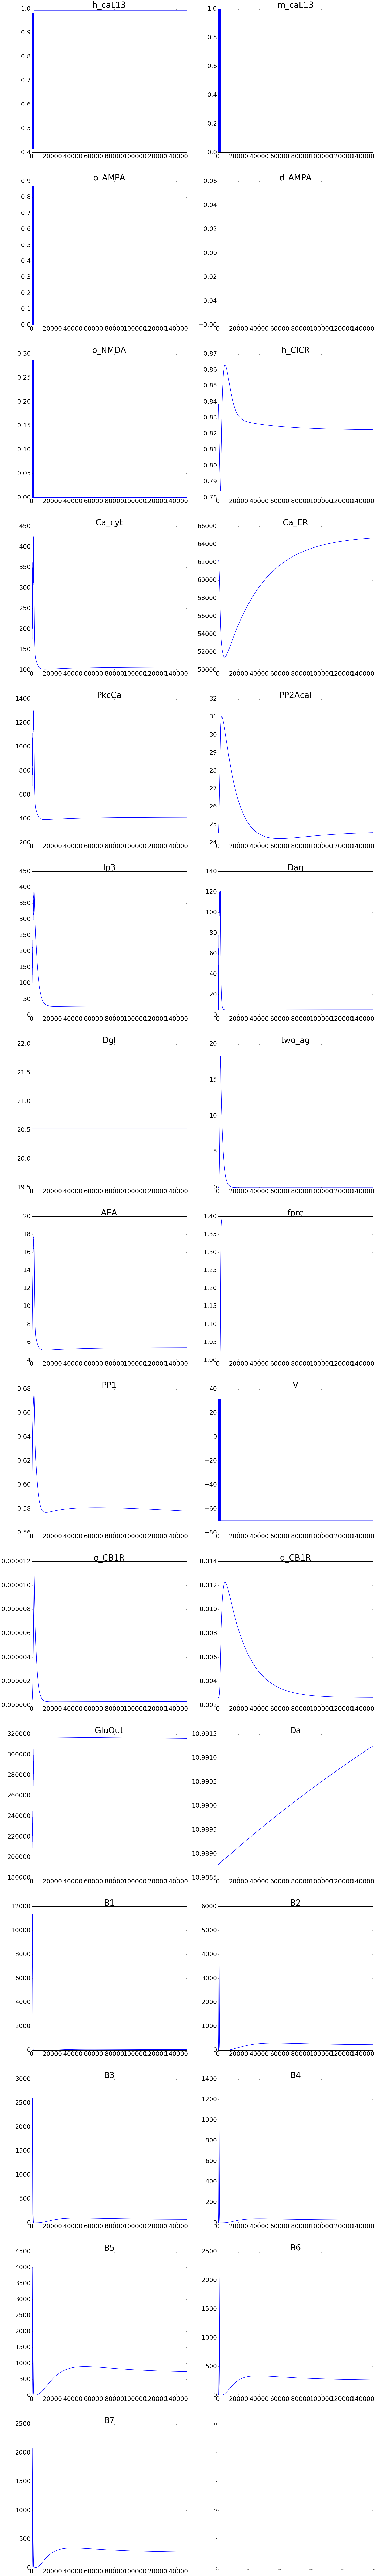

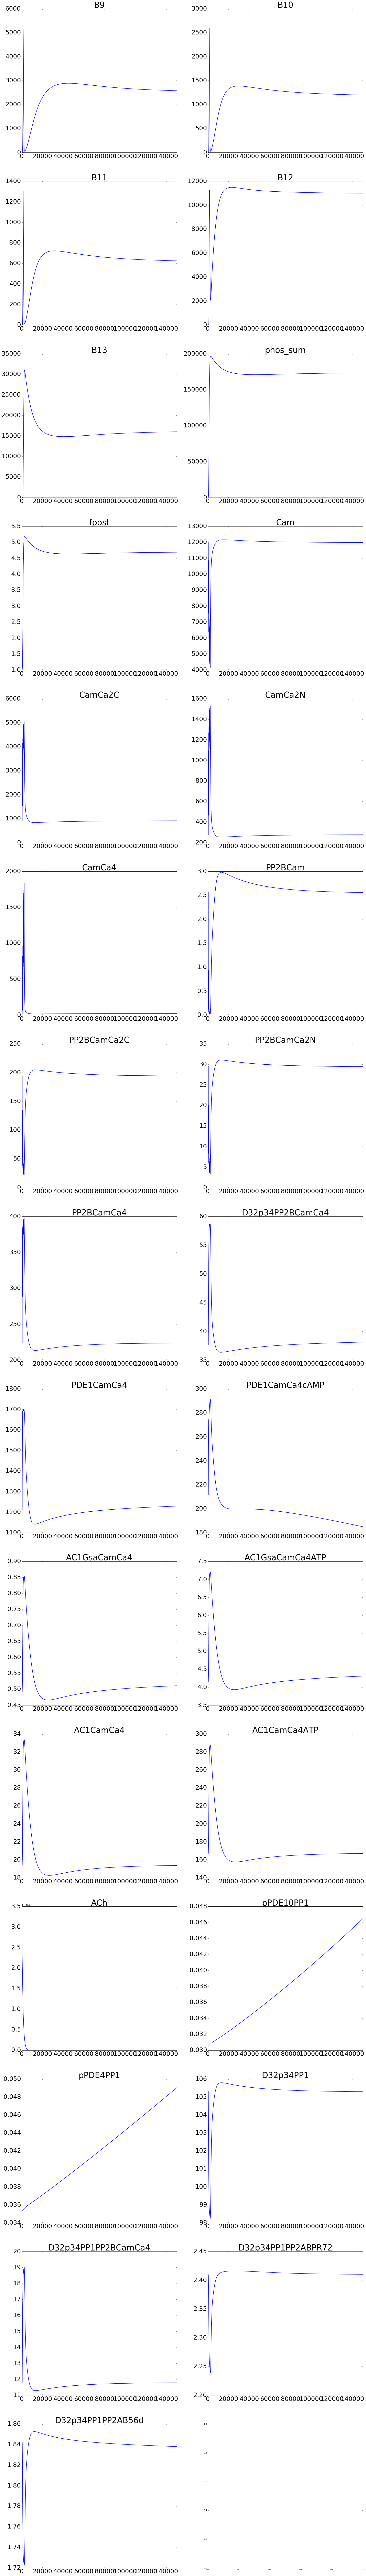

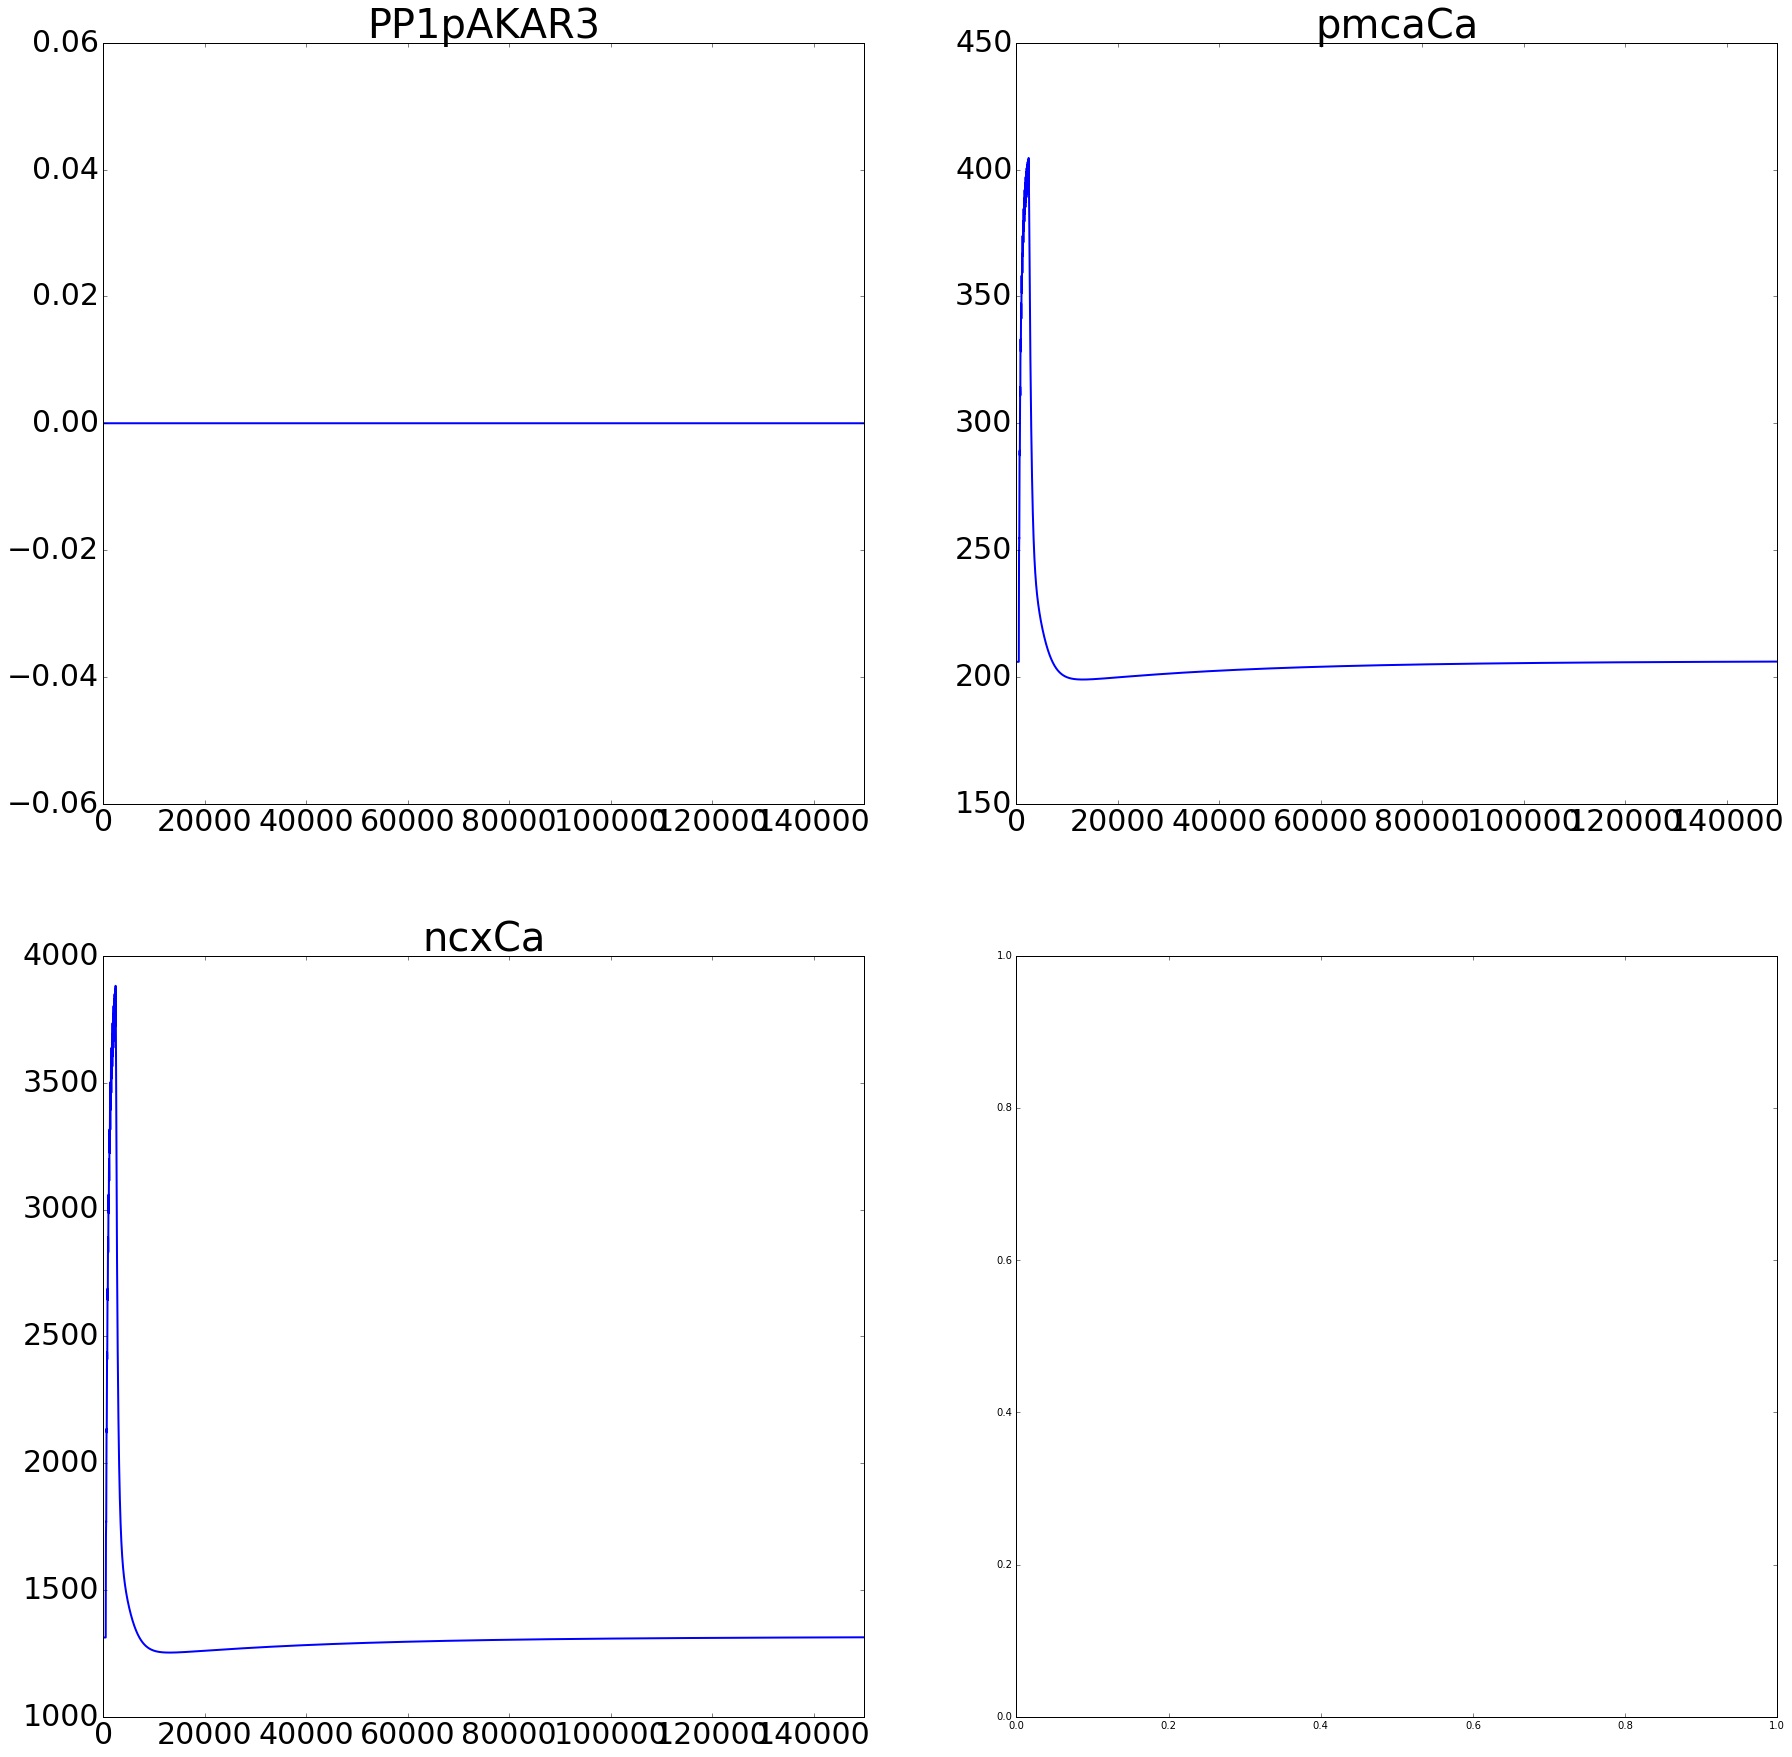

In [5]:
num_plot = 30
nb_variable = len(y_serie_temp.columns)

for i in xrange(int(nb_variable/num_plot)):
    DataFrame_plot_pylab(y_serie_temp.iloc[:,i*num_plot:(i+1)*num_plot -1], fontsize = 30)
DataFrame_plot_pylab(y_serie_temp.iloc[:,(i+1)*num_plot-1:(i+1)*num_plot-1 +nb_variable%num_plot], fontsize = 30)

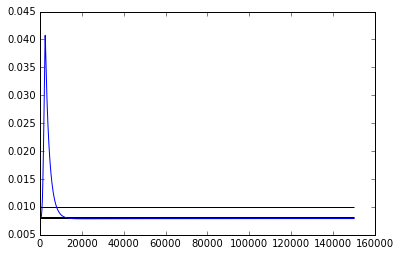

In [6]:
plt.plot(y_serie_temp['yCB1R'])
plt.hlines(0.008, y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(0.00823, y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(0.01, y_serie_temp.index[0],y_serie_temp.index[-1])

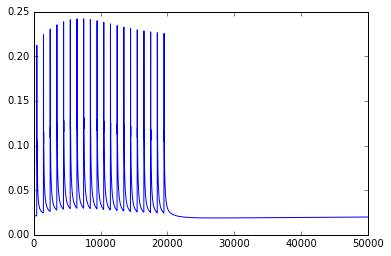

In [7]:
gamma = y_serie['CamCa4']/(500. +y_serie['CamCa4'])
plt.plot(gamma)


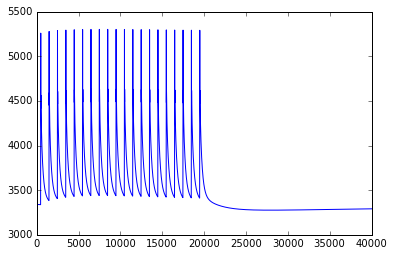

In [8]:
CaM = y_serie['PP2BCamCa4'] +y_serie['CamCa4'] +y_serie['D32p34PP2BCamCa4'] +y_serie['D32p34PP1PP2BCamCa4'] +y_serie['PDE1CamCa4']+ y_serie['PDE1CamCa4cAMP'] 
plt.plot(CaM)

In [14]:
gamma = CaM/(300. +CaM)
plt.plot(gamma)

NameError: name 'CaM' is not defined

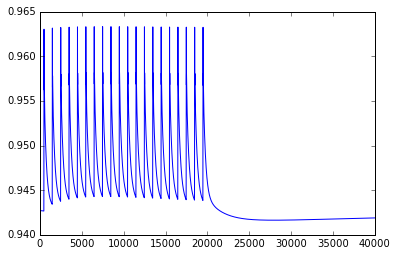

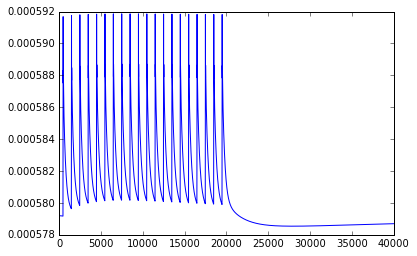

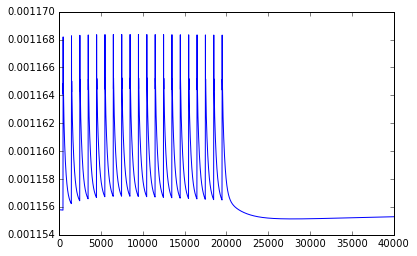

In [14]:
gamma2 = gamma**2
k6gamma2 = params_dict['k6']*gamma2
k7gamma = params_dict['k7']*gamma

plt.plot(gamma2)

plt.figure()
plt.plot(k6gamma2)

plt.figure()
plt.plot(k7gamma)

In [10]:
y_serie['CamCa4']+ y_serie['PP2BCamCa4']+ y_serie['D32p34PP2BCamCa4']+ y_serie['D32p34PP1PP2BCamCa4']+ y_serie['PDE1CamCa4']+ y_serie['PDE1CamCa4cAMP']

0.0         319.000000
1.0         481.002244
2.0         466.918798
3.0         453.048780
4.0         443.116970
5.0         436.996953
6.0         433.818378
7.0         432.751942
8.0         433.164166
9.0         434.605560
10.0        436.766421
11.0        439.435899
12.0        442.471061
13.0        445.775098
14.0        449.282378
15.0        452.948321
16.0        456.742564
17.0        460.644346
18.0        464.639400
19.0        468.717844
20.0        472.872769
21.0        477.099270
22.0        481.393803
23.0        485.753738
24.0        490.177065
25.0        494.662191
26.0        499.207801
27.0        503.812767
28.0        508.476088
29.0        513.196840
              ...     
49971.0    5191.196070
49972.0    5191.205060
49973.0    5191.214049
49974.0    5191.223039
49975.0    5191.232028
49976.0    5191.241017
49977.0    5191.250006
49978.0    5191.258994
49979.0    5191.267982
49980.0    5191.276970
49981.0    5191.285958
49982.0    5191.294945
49983.0    

In [6]:
Camtotal = y_serie['Cam']+ y_serie['CamCa2C']+ y_serie['CamCa2N']+ y_serie['CamCa4']+ y_serie['PP2BCam']+ y_serie['PP2BCamCa2C']+ y_serie['PP2BCamCa2N']+ y_serie['PP2BCamCa4']+ y_serie['D32p34PP2BCamCa4']+ y_serie['D32p34PP1PP2BCamCa4']+ y_serie['PDE1CamCa4']+ y_serie['PDE1CamCa4cAMP'] +y_serie['AC1GsaCamCa4'] +y_serie['AC1GsaCamCa4ATP'] +y_serie['AC1CamCa4'] +y_serie['AC1CamCa4ATP']
Camtotal

0.0       14853.85
1.0       14853.85
2.0       14853.85
3.0       14853.85
4.0       14853.85
5.0       14853.85
6.0       14853.85
7.0       14853.85
8.0       14853.85
9.0       14853.85
10.0      14853.85
11.0      14853.85
12.0      14853.85
13.0      14853.85
14.0      14853.85
15.0      14853.85
16.0      14853.85
17.0      14853.85
18.0      14853.85
19.0      14853.85
20.0      14853.85
21.0      14853.85
22.0      14853.85
23.0      14853.85
24.0      14853.85
25.0      14853.85
26.0      14853.85
27.0      14853.85
28.0      14853.85
29.0      14853.85
            ...   
971.0     14853.85
972.0     14853.85
973.0     14853.85
974.0     14853.85
975.0     14853.85
976.0     14853.85
977.0     14853.85
978.0     14853.85
979.0     14853.85
980.0     14853.85
981.0     14853.85
982.0     14853.85
983.0     14853.85
984.0     14853.85
985.0     14853.85
986.0     14853.85
987.0     14853.85
988.0     14853.85
989.0     14853.85
990.0     14853.85
991.0     14853.85
992.0     14

In [7]:
params_dict['forwardRate_CamC_bind']

0.0006000000000000001

0.0        0.019120
1.0        0.019104
2.0        0.019089
3.0        0.019074
4.0        0.019059
5.0        0.019045
6.0        0.019030
7.0        0.019016
8.0        0.019001
9.0        0.018987
10.0       0.018973
11.0       0.018959
12.0       0.018945
13.0       0.018932
14.0       0.018918
15.0       0.018905
16.0       0.018891
17.0       0.018878
18.0       0.018865
19.0       0.018852
20.0       0.018839
21.0       0.018827
22.0       0.018814
23.0       0.018802
24.0       0.018789
25.0       0.018777
26.0       0.018765
27.0       0.018753
28.0       0.018741
29.0       0.018729
             ...   
49971.0    0.000250
49972.0    0.000250
49973.0    0.000250
49974.0    0.000250
49975.0    0.000250
49976.0    0.000250
49977.0    0.000250
49978.0    0.000250
49979.0    0.000250
49980.0    0.000250
49981.0    0.000250
49982.0    0.000250
49983.0    0.000250
49984.0    0.000250
49985.0    0.000250
49986.0    0.000250
49987.0    0.000250
49988.0    0.000250
49989.0    0.000250


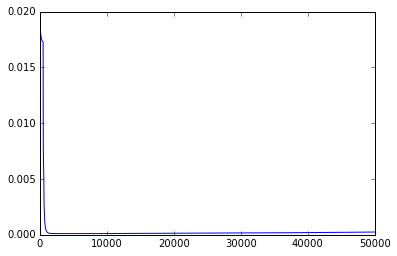

In [13]:

k10 = 12.*y_serie['PP1']/(900. +y_serie['phos_sum'])
plt.plot(k10)
print k10
print params_dict['k12']
print params_dict['KM']

In [7]:
PP2Btot = y_serie['PP2B'] +y_serie['PP2BCam'] +y_serie['PP2BCamCa2C'] +y_serie['PP2BCamCa2N'] +y_serie['PP2BCamCa4'] +y_serie['D32p34PP2BCamCa4']
PP2Btot

0.0       4936.291429
1.0       4936.291429
2.0       4936.291429
3.0       4936.291429
4.0       4936.291429
5.0       4936.291429
6.0       4936.291429
7.0       4936.291429
8.0       4936.291429
9.0       4936.291429
10.0      4936.291429
11.0      4936.291429
12.0      4936.291429
13.0      4936.291429
14.0      4936.291429
15.0      4936.291429
16.0      4936.291429
17.0      4936.291429
18.0      4936.291429
19.0      4936.291429
20.0      4936.291429
21.0      4936.291429
22.0      4936.291429
23.0      4936.291429
24.0      4936.291429
25.0      4936.291429
26.0      4936.291429
27.0      4936.291429
28.0      4936.291429
29.0      4936.291429
             ...     
971.0     4936.291429
972.0     4936.291429
973.0     4936.291429
974.0     4936.291429
975.0     4936.291429
976.0     4936.291429
977.0     4936.291429
978.0     4936.291429
979.0     4936.291429
980.0     4936.291429
981.0     4936.291429
982.0     4936.291429
983.0     4936.291429
984.0     4936.291429
985.0     

In [6]:
PP1tot = y_serie['pPDE10PP1']+y_serie['pPDE4PP1']+y_serie['PP1']+y_serie['D32p34PP1']+y_serie['D32p34PP1PP2BCamCa4']+y_serie['D32p34PP1PP2ABPR72']+y_serie['D32p34PP1PP2AB56d']+y_serie['PP1pAKAR3']
PP1tot

0.0        23.0
1.0        23.0
2.0        23.0
3.0        23.0
4.0        23.0
5.0        23.0
6.0        23.0
7.0        23.0
8.0        23.0
9.0        23.0
10.0       23.0
11.0       23.0
12.0       23.0
13.0       23.0
14.0       23.0
15.0       23.0
16.0       23.0
17.0       23.0
18.0       23.0
19.0       23.0
20.0       23.0
21.0       23.0
22.0       23.0
23.0       23.0
24.0       23.0
25.0       23.0
26.0       23.0
27.0       23.0
28.0       23.0
29.0       23.0
           ... 
49971.0    23.0
49972.0    23.0
49973.0    23.0
49974.0    23.0
49975.0    23.0
49976.0    23.0
49977.0    23.0
49978.0    23.0
49979.0    23.0
49980.0    23.0
49981.0    23.0
49982.0    23.0
49983.0    23.0
49984.0    23.0
49985.0    23.0
49986.0    23.0
49987.0    23.0
49988.0    23.0
49989.0    23.0
49990.0    23.0
49991.0    23.0
49992.0    23.0
49993.0    23.0
49994.0    23.0
49995.0    23.0
49996.0    23.0
49997.0    23.0
49998.0    23.0
49999.0    23.0
50000.0    23.0
dtype: float64

In [1]:
params_dict['K5']

NameError: name 'params_dict' is not defined